In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("merged_df.csv")
data

,Home Team Name,Away Team Name,G_Home,W_Home,L_Home,W-L%_Home,SRS_Home,SOS_Home,W.1_Home,L.1_Home,...,FTA_Away,FT%_Away,ORB_Away,TRB_Away,AST_Away,STL_Away,BLK_Away,TOV_Away,PF_Away,Home Win
0,Davidson,Charleston Southern,32,17,15,0.531,6.45,4.26,8,10,...,643.0,0.666,336.0,1092.0,341.0,176.0,89.0,358.0,620.0,1
1,Dayton,Ball State,32,24,8,0.750,12.98,4.27,15,3,...,696.0,0.718,335.0,1281.0,529.0,203.0,118.0,496.0,658.0,1
2,Fordham,Miami (OH),32,13,19,0.406,-1.97,1.36,7,11,...,689.0,0.691,298.0,1091.0,364.0,238.0,125.0,467.0,642.0,0
3,George Mason,Lafayette,34,20,14,0.588,3.01,1.28,9,9,...,492.0,0.711,205.0,956.0,378.0,148.0,85.0,436.0,514.0,1
4,Virginia Commonwealth,Grambling,35,26,9,0.743,11.57,3.77,14,4,...,747.0,0.663,398.0,1108.0,368.0,292.0,76.0,450.0,658.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,Rhode Island,Davidson,35,25,10,0.714,12.88,4.62,13,5,...,587.0,0.753,285.0,1149.0,499.0,163.0,106.0,390.0,583.0,0
5406,Cincinnati,Houston,36,30,6,0.833,18.43,5.49,16,2,...,544.0,0.717,362.0,1138.0,406.0,170.0,113.0,315.0,601.0,1
5407,Harvard,Pennsylvania,28,18,10,0.643,2.30,-2.24,10,4,...,417.0,0.657,267.0,972.0,401.0,181.0,100.0,358.0,501.0,0
5408,Tennessee,Kentucky,32,16,16,0.500,11.28,10.18,8,10,...,980.0,0.704,470.0,1512.0,585.0,229.0,200.0,443.0,716.0,0


In [9]:
X = data.iloc[:,2:64]
y = data.iloc[:,64]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [12]:
clf.score(X_test,y_test)

0.6543438077634011

### PCA

In [37]:
scores = []

for i in range(1,30):
    # Assuming 'X' is your data matrix
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)
    #X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    clf2 = svm.SVC()
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

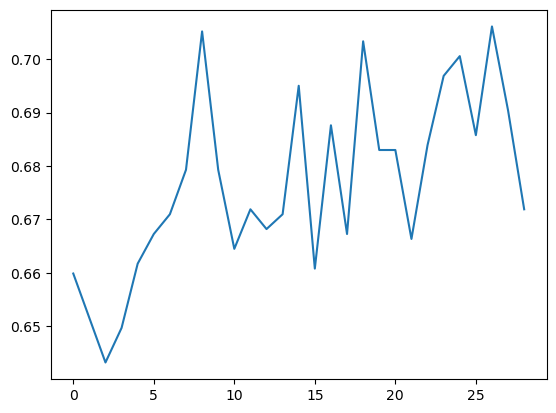

In [38]:
plt.plot(scores)

Based on the above it doesn't make sense to do PCA. We should instead maybe do some different feature testing...